# Artificial Neural Networks and Deep Learning---## Homework 1: Minimal Working ExampleTo make your first submission, follow these steps:1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.2. Upload the `training_set.npz` file to this folder.3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.4. Load and process the data.5. Implement and train your model.6. Submit the generated `.zip` file to Codabench.

## 🌐 Connect Colab to Google Drive

In [1]:
!pip install tensorflow==2.17.0 keras==3.4.1 tensorflow-decision-forests==1.10.0 tensorflow-text==2.17.0 tf-keras==2.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 77.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 77.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.4 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16

In [6]:
!pip install google

^C


In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 1

ModuleNotFoundError: No module named 'google.colab'

## ⚙️ Import Libraries

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
np.random.seed(42)
tf.random.set_seed(42);

## ⏳ Load the Data

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Carica il dataset
data = np.load('/kaggle/input/blood-cells/training_set.npz')
X_train = data['images']
y_train = data['labels']


# Carica il dataset
data2 = np.load('/kaggle/input/blood-cells/test_set.npz')
X_test2 = data['images']
y_test2 = data['labels']


# Converti y in one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test2 = tf.keras.utils.to_categorical(y_test2, num_classes=8)


In [5]:
import hashlib

def image_hash(image):
    image_bytes = image.tobytes()
    return hashlib.sha256(image_bytes).hexdigest()

unique_images = []
unique_labels = []
duplicate_positions = set()

seen_hashes = {}

for i in range(len(X_train)):
    img_hash = image_hash(X_train[i])
    if img_hash not in seen_hashes:
        if i not in duplicate_positions:
            unique_images.append(X_train[i])
            unique_labels.append(y_train[i])
        seen_hashes[img_hash] = i
    else:
        duplicate_positions.add(seen_hashes[img_hash])
        duplicate_positions.add(i)

X_train = [X_train[i] for i in range(len(X_train)) if i not in duplicate_positions]
y_train = [y_train[i] for i in range(len(y_train)) if i not in duplicate_positions]

X_train = np.array(X_train)
y_train = np.array(y_train)


In [6]:
# split train in training and test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


In [14]:
X_test[0]

array([[[204, 164, 164],
        [204, 164, 164],
        [204, 164, 164],
        ...,
        [218, 180, 172],
        [217, 179, 171],
        [219, 181, 173]],

       [[206, 166, 166],
        [206, 166, 166],
        [206, 166, 166],
        ...,
        [219, 178, 173],
        [217, 176, 171],
        [219, 178, 173]],

       [[205, 166, 165],
        [206, 166, 166],
        [206, 166, 166],
        ...,
        [221, 177, 174],
        [219, 176, 172],
        [218, 174, 171]],

       ...,

       [[210, 176, 167],
        [211, 177, 168],
        [210, 177, 168],
        ...,
        [220, 184, 177],
        [221, 185, 178],
        [221, 186, 178]],

       [[209, 175, 166],
        [211, 177, 168],
        [211, 177, 168],
        ...,
        [225, 191, 181],
        [226, 192, 182],
        [226, 192, 183]],

       [[210, 173, 165],
        [213, 176, 167],
        [214, 177, 168],
        ...,
        [226, 194, 180],
        [226, 194, 183],
        [226, 193, 184]]

## 🛠️ Train and Save the Model

[0. 0. 0. 0. 0. 1. 0. 0.]


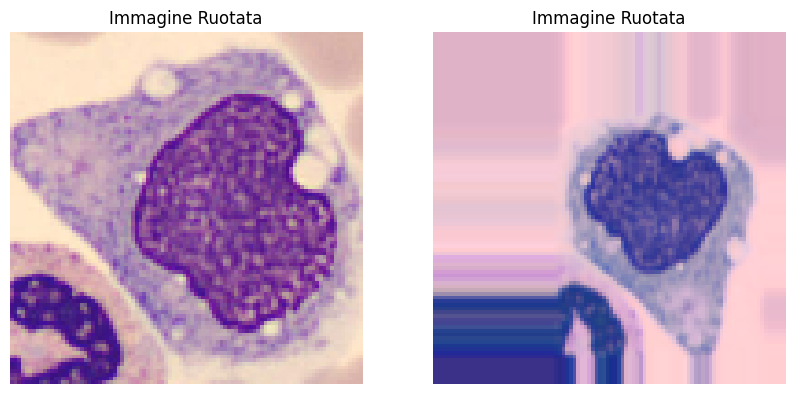

In [69]:
import matplotlib.pyplot as plt
import keras_cv

data_augmentation = model.get_augmentation_layer()




# Applica la rotazione casuale
rotated_image = data_augmentation(X_train[6001])
print(y_train[6001])

# Visualizza l'immagine originale e quella ruotata
plt.figure(figsize=(10, 5))

# Mostra l'immagine ruotata
plt.subplot(1, 2, 1)
plt.imshow(X_train[6001])
plt.title("Immagine Ruotata")
plt.axis('off')


# Mostra l'immagine ruotata
plt.subplot(1, 2, 2)
plt.imshow(rotated_image / 255.0)
plt.title("Immagine Ruotata")
plt.axis('off')

plt.show()

In [10]:
import numpy as np
import tensorflow as tf
import keras_cv
from tensorflow import keras as tfk
from tensorflow.keras import layers, models, applications
from tensorflow.keras.callbacks import LambdaCallback
import random
import keras
from keras.saving import register_keras_serializable


class MyModel:
    def __init__(self):
        """
        Inizializza lo stato interno del modello MobileNetV3Small pre-addestrato.
        """
        self.neural_network = self.create_model()

    def get_augmentation_layer(self):
        # Definizione dei layer di data augmentation
        return tf.keras.Sequential([
            # Rotazione casuale
            keras.layers.RandomRotation(0.5, fill_mode='reflect'),

            # Zoom casuale in altezza
            keras.layers.RandomZoom(height_factor=(-0.2, 0.7), fill_mode='nearest'),

            # Altri tipi di augmentazioni
            keras.layers.RandomZoom(height_factor=(0.0, 0.0), width_factor=(-0.3, 0.3), fill_mode='nearest'),
            keras.layers.RandomFlip(mode="horizontal"),
            keras.layers.RandomFlip(mode="vertical"),
            keras.layers.RandomTranslation(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
            
            keras.layers.RandomBrightness(0.3),
            keras_cv.layers.RandomHue(0.3, [0,255]),

            # Aggiunta di rumore gaussiano
            keras.layers.GaussianNoise(0.05)
        ])


    def create_model(self):
        """
        Crea e restituisce un modello con MobileNetV3Small.
        """
        # Definisci i layer di data augmentation
        data_augmentation = self.get_augmentation_layer()

        # Utilizza una rete pre-addestrata
        model_pretrained = tfk.applications.ConvNeXtBase(
            input_shape=(96, 96, 3),
            include_top=False,
            weights='imagenet',
            pooling='avg'  # Pooling globale per ridurre la dimensionalità
        )
        self.model_name_pretrained = 'convnext_base'

        print("number of layers:")
        print(len(model_pretrained.layers))

        # Costruisci il modello
        inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')
        x = data_augmentation(inputs)
        x = model_pretrained(x)
        
        x = tfk.layers.Dense(512, activation='relu')(x)
        x = tfk.layers.Dropout(0.3)(x)
        x = tfk.layers.Dense(256, activation='relu')(x)
        x = tfk.layers.Dropout(0.3)(x)
        '''
        x = tfk.layers.Dense(128, activation='relu')(x)
        x = tfk.layers.Dropout(0.3)(x)'''
        outputs = tfk.layers.Dense(8, activation='softmax', name='output_layer')(x)

        model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

        return model

    def train_transfer_learning(self, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
        """
        Pre-addestra il modello con i layer congelati.
        """


        self.neural_network.get_layer(self.model_name_pretrained).trainable = False

        # Sblocca i layer convoluzionali dal layer `fine_tune_from` in poi
        for i, layer in enumerate(self.neural_network.get_layer(self.model_name_pretrained).layers):
            layer.trainable = False
            
        # Ricompila il modello (necessario dopo aver modificato i layer trainabili)
        self.neural_network.compile(
            loss=tfk.losses.CategoricalCrossentropy(),
            optimizer=tfk.optimizers.Lion(),
            metrics=['accuracy']
        )


        # Callback
        save_every_10 = LambdaCallback(
            on_epoch_end=lambda epoch, logs:
            self.neural_network.save(f'model_epoch_{epoch + 1}.keras') if (epoch + 1) % 10 == 0 else None
        )
        early_stopping = tfk.callbacks.EarlyStopping(
            monitor='val_accuracy',
            mode='max',
            patience=20,
            restore_best_weights=True
        )

        # Riaddestra il modello
        history = self.neural_network.fit(
            x=X_train,
            y=y_train,
            batch_size=batch_size,
            epochs=epochs,
            shuffle=True,
            validation_data=(X_test, y_test),
            callbacks=[save_every_10, early_stopping]
        )

    def train_fine_tuning(self, X_train, y_train, X_test, y_test, epochs=10, batch_size=32, fine_tune_from=50):
        """
        Sblocca i layer selezionati e riaddestra il modello.
        """

        self.neural_network.get_layer(self.model_name_pretrained).trainable = True

        # Sblocca i layer convoluzionali dal layer `fine_tune_from` in poi
        for i, layer in enumerate(self.neural_network.get_layer(self.model_name_pretrained).layers):
            layer.trainable = False
            if i > fine_tune_from:
              if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
                  layer.trainable = True


        # Ricompila il modello con un learning rate più basso
        self.neural_network.compile(
            loss=tfk.losses.CategoricalCrossentropy(),
            optimizer=tfk.optimizers.Lion(learning_rate=1e-4),
            metrics=['accuracy']
        )

        # Callback
        save_every_10 = LambdaCallback(
            on_epoch_end=lambda epoch, logs:
            self.neural_network.save(f'model_epoch_{epoch + 1}.keras') if (epoch + 1) % 10 == 0 else None
        )
        early_stopping = tfk.callbacks.EarlyStopping(
            monitor='val_accuracy',
            mode='max',
            patience=20,
            restore_best_weights=True
        )

        # Riaddestra il modello
        history = self.neural_network.fit(
            x=X_train,
            y=y_train,
            batch_size=batch_size,
            epochs=epochs,
            shuffle=True,
            validation_data=(X_test, y_test),
            callbacks=[save_every_10, early_stopping]
        )

    def test(self, X_test, y_test):
        """
        Valuta il modello sui dati di test X_test e le etichette y_test.
        """
        test_loss, test_acc = self.neural_network.evaluate(X_test, y_test)
        print(f'Test accuracy: {test_acc}')

    def save(self):
        """
        Salva il modello senza i layer di data augmentation.
        """
        self.neural_network.save('/gdrive/MyDrive/[2024-2025] AN2DL/Homework 1/weights.keras')

    def predict(self, X):
        """
        Predice le etichette corrispondenti all'input X.
        """
        preds = self.neural_network.predict(X)
        preds = np.argmax(preds, axis=1)
        return preds



In [11]:
model = MyModel()

number of layers:
260


In [15]:
model.neural_network.save('weights2.keras')

In [188]:
X_test_augmented = model.get_augmentation_layer()(X_test)


In [12]:
model.train_transfer_learning(X_train, y_train, X_test, y_test, 20, 512)

Epoch 1/20


W0000 00:00:1731831428.381776     127 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831428.450317     127 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831428.453956     127 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831428.457478     127 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831428.460702     127 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831428.463677     127 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831428.467528     127 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831428.471331     127 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831428.475528     127 gp

20/21 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3852 - loss: 1.7484

W0000 00:00:1731831516.107803     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831516.110962     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831516.113672     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831516.116369     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831516.118631     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831516.120642     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831516.123314     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831516.125986     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831516.129301     125 gp

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3913 - loss: 1.7300

W0000 00:00:1731831534.708989     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831534.711756     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831534.714768     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831534.717666     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831534.719427     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831534.721126     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831534.723094     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831534.725068     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731831534.727167     125 gp

21/21 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - accuracy: 0.3968 - loss: 1.7133 - val_accuracy: 0.6887 - val_loss: 0.8040
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.6877 - loss: 0.8600 - val_accuracy: 0.7967 - val_loss: 0.5889
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.7707 - loss: 0.6373 - val_accuracy: 0.8577 - val_loss: 0.4174
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.8048 - loss: 0.5651 - val_accuracy: 0.8678 - val_loss: 0.3995
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.8204 - loss: 0.5147 - val_accuracy: 0.8803 - val_loss: 0.3595
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.8254 - loss: 0.5054 - val_accuracy: 0.8778 - val_loss: 0.3398
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.8416 - loss: 0.4734 - val_accuracy: 0.8912 - val_loss: 0.3170
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 103s 5s/step - accuracy: 0.8400 - loss: 0.4661 - val_accuracy: 0.8929 - val_loss: 0.

In [ ]:
model.train_fine_tuning(X_train, y_train, X_test, y_test, 50, 512, 220)

Epoch 1/50


W0000 00:00:1731834364.801918     126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731834364.828063     126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731834364.881078     126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731834364.990719     126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731834365.112208     126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731834365.429615     126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731834365.916567     126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced


18/21 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.8538 - loss: 0.4149

In [195]:
model.neural_network.save('weights3.keras')

In [13]:
model.test(X_test2, y_test2)

W0000 00:00:1731833519.419764     124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833519.421452     124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833519.422807     124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833519.424126     124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833519.425448     124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833519.426749     124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833519.428075     124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833519.429414     124 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833519.430791     124 gp

429/430 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.8986 - loss: 0.3218

W0000 00:00:1731833634.843365     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833634.844502     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833634.845589     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833634.846666     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833634.847725     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833634.848751     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833634.849816     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833634.850873     125 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731833634.851987     125 gp

430/430 ━━━━━━━━━━━━━━━━━━━━ 118s 269ms/step - accuracy: 0.8982 - loss: 0.3255
Test accuracy: 0.8039828538894653


In [126]:
preds = model.predict(X_test)

37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

W0000 00:00:1731801827.519792     117 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731801827.520583     117 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731801827.521274     117 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731801827.521970     117 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731801827.522668     117 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731801827.523374     117 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731801827.524083     117 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731801827.524813     117 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731801827.525522     117 gp

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step


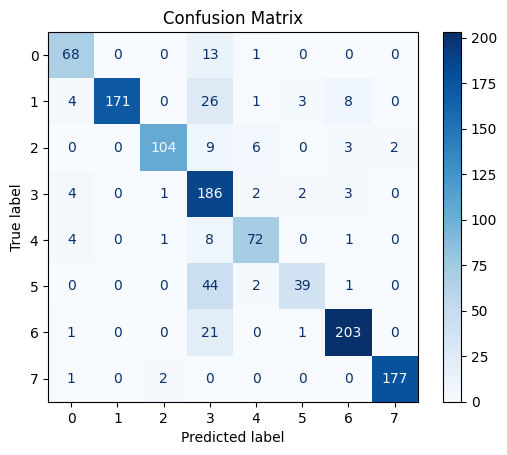

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = np.argmax(y_test, axis=1)
y_pred = preds
# Genera la confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Visualizza la confusion matrix con le etichette
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  
# Usa una mappa di colori blu
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.neural_network.save('/gdrive/MyDrive/weights.keras')

## 📊 Prepare Your SubmissionTo prepare your submission, create a `.zip` file that includes all the necessary code to run your model. It **must** include a `model.py` file with the following class:```python# file: model.pyclass Model:    def __init__(self):        """Initialize the internal state of the model."""    def predict(self, X):        """Return a numpy array with the labels corresponding to the input X."""```The next cell shows an example implementation of the `model.py` file, which includes loading model weights from the `weights.keras` file and conducting predictions on provided input data. The `.zip` file is created and downloaded in the last notebook cell.❗ Feel free to modify the method implementations to better fit your specific requirements, but please ensure that the class name and method interfaces remain unchanged.

In [ ]:
class Model2:    def __init__(self):        # Carica il modello senza compilazione        self.neural_network = tfk.models.load_model('/gdrive/MyDrive/weights.keras')    def test(self, X_test, y_test):        test_loss, test_acc = self.neural_network.evaluate(X_test, y_test)        print(f'Test accuracy: {test_acc}')    def predict(self, X):        preds = self.neural_network.predict(X)        if len(preds.shape) == 2:            preds = np.argmax(preds, axis=1)        return preds

In [ ]:
model2 = Model2()model2.test(X_test2, y_test2)

430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8567 - loss: 0.4495
Test accuracy: 0.7682244181632996

In [ ]:
from datetime import datetimefilename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'# Add files to the zip command if needed!zip {filename} model.py weights.kerasfrom google.colab import filesfiles.download(filename)

	zip warning: name not matched: model.py
	zip warning: name not matched: weights.keras

zip error: Nothing to do! (submission_241108_182910.zip)

FileNotFoundError: Cannot find file: submission_241108_182910.zip